# Agglomerative Clustering Implementation

To conduct Agglomerative Clustering on the given dataset, we need to follow the following steps:
1. Load or generate the dataset that we want to cluster. 
2. Compute the pairwise distance matrix between each pair of data points.
3. Initialize each data point as its own cluster.
4. Find the two closest clusters based on the distance matrix.
5. Merge the two closest clusters into a single cluster.
6. Update the distance matrix to reflect the new cluster.
7. Repeat steps 4-6 until the desired number of clusters is reached.

Step 1: Import the required libraries

In [44]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
%matplotlib inline

Step 2: Loading and Cleaning the data 

In [45]:
# read data from a CSV file
df = pd.read_csv('data.csv')
# Clean up data, delete diagnosis, id and the last empty column.
X = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)

Step 3: Preprocessing the data 

In [47]:
# Preprocessing the data & normalization
from sklearn.preprocessing import StandardScaler, normalize

# Scaling the data
X = StandardScaler().fit_transform(X)

# Normalizing the data
X = normalize(X)

Step 4: Reducing the dimensionality of the Data 

In [48]:
#Reducing the dimensionality of the Data
from sklearn.decomposition import PCA
X = PCA(n_components=2).fit_transform(X)

Step 4: Define a function to compute the pairwise distance matrix between all data points

In [49]:
# Define a function to compute the distance matrix
# This matrix will be the input of Agglomerative Clustering
def compute_distance_matrix(data):
    n = len(data)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            dist_matrix[i,j] = np.linalg.norm(data[i]-data[j])
            dist_matrix[j,i] = dist_matrix[i,j]
    return dist_matrix

Step 5: Define a function to find the two closest clusters

In [50]:
# Define a function to find the two closest clusters
def find_closest_clusters(dist_matrix):
    dist_min = float('inf')
    closest_clusters = None
    
    for i in range(len(dist_matrix)):
        for j in range(i+1, len(dist_matrix)):
            if dist_matrix[i][j] < dist_min:
                dist_min = dist_matrix[i][j]
                closest_clusters = (i, j)
                
    return closest_clusters

Step 6: Define a function to merge the two closest clusters into a single cluster

In [51]:
# Define a function to merge the two closest clusters into a single cluster
def merge_clusters(cluster1, cluster2):
    new_cluster = []
    new_cluster.extend(cluster1)
    new_cluster.extend(cluster2)
    return new_cluster

Step 7: Define a function to update the distance matrix to reflect the new cluster

In [52]:
# Define a function to update the distance matrix to reflect the new cluster
def update_distance_matrix(dist_matrix, cluster1_index, cluster2_index):

    # Compute the distances between the new cluster and all other clusters
    new_distances = []
    for i in range(len(dist_matrix)):
        if i != cluster1_index and i != cluster2_index:
            dist = min(dist_matrix[cluster1_index][i], dist_matrix[cluster2_index][i])
            new_distances.append(dist)
    
    # Add the new cluster distances to the distance matrix
    new_row = [0] * (len(dist_matrix) - 1)
    for i in range(len(new_row)):
        if i < cluster1_index:
            new_row[i] = dist_matrix[i][cluster1_index]
        elif i < cluster2_index - 1:
            new_row[i] = dist_matrix[cluster1_index][i+1]
        elif i < len(new_row):
            new_row[i] = dist_matrix[cluster2_index][i+1]
    
    new_distances.append(new_row)
    
    # Remove the old cluster distances from the distance matrix
    new_dist_matrix = []
    for i in range(len(dist_matrix)):
        if i != cluster1_index and i != cluster2_index:
            new_dist_matrix.append(dist_matrix[i])
    
    new_dist_matrix.append(new_distances)
    
    return new_dist_matrix

Step 8: Define the Agglomerative Clustering function

In [53]:
def agglomerative_clustering_single_linkage(data):
    
    # Initialize the clusters to contain one point each
    clusters = [[i] for i in range(len(data))]
    
    # Compute the initial distance matrix
    dist_matrix = compute_distance_matrix(data)
    
    # Merge clusters until there is only one cluster left
    while len(clusters) > 1:
        # Find the closest two clusters
        c1, c2 = find_closest_clusters(dist_matrix)
        
        # Merge the two closest clusters into a single cluster
        new_cluster = merge_clusters(clusters[c1], clusters[c2])
        clusters.pop(c2)
        clusters[c1] = new_cluster
        
        # Update the distance matrix
        dist_matrix = update_distance_matrix(dist_matrix, c1, c2)
        
    return clusters

Step 9: Run agglomerative clustering with single linkage

In [201]:
# Run agglomerative clustering with single linkage
clusters =  agglomerative_clustering_single_linkage(X)

Step 10: Show the scatterplot of the dataset with a unique integer number on top of each point

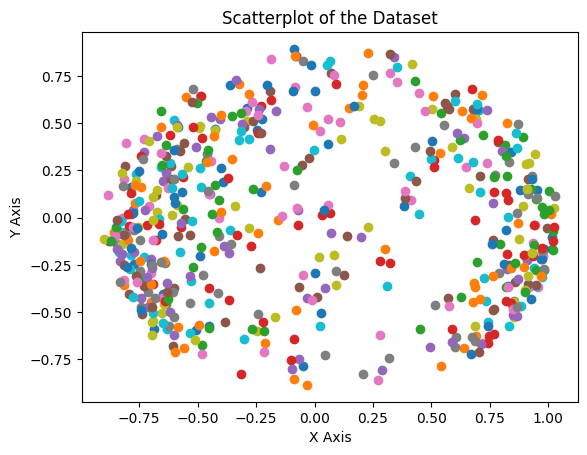

In [188]:
# Plot the scatterplot of the dataset
# Plot each point in the dataset with a unique integer label on top
for i, point in enumerate(X):
    plt.scatter(point[0], point[1])

# Set the plot title and axis labels
plt.title("Scatterplot of the Dataset")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

# Show the plot
plt.show()

Step 11: Show the corresponding dendrogram where on each leaf the same integer number as the corresponding point of the scatterplot is indicated

<ipython-input-55-321152e91162>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = shc.dendrogram(shc.linkage(distance_matrix, method='single'), labels=[str(i) for i in range(len(X))])


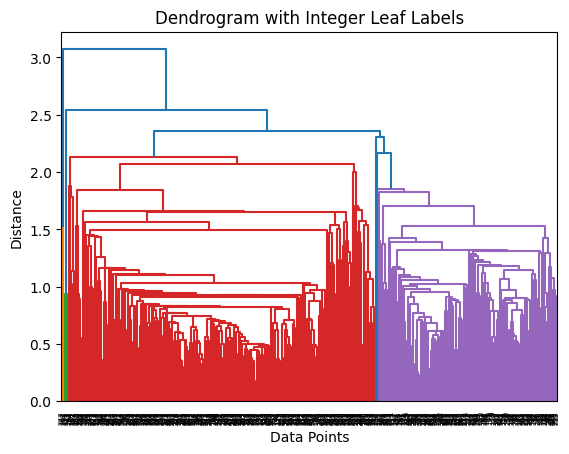

In [55]:
# Generate the dendrogram
distance_matrix = compute_distance_matrix(X)
dendrogram = shc.dendrogram(shc.linkage(distance_matrix, method='single'), labels=[str(i) for i in range(len(X))])

# Set the plot title and axis labels
plt.title("Dendrogram with Integer Leaf Labels")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Show the plot
plt.show()

# Evaluation & Cross-validation

## Measure the Silhouette coefficient averaged over all data points

In [76]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with single linkage
cluster = AgglomerativeClustering(n_clusters=2, linkage='single')

# Fit the model to the data and obtain cluster labels
labels = cluster.fit_predict(X)

# Compute the Silhouette coefficient
score = silhouette_score(X, labels)

print("The average Silhouette coefficient score is :", score)

The average Silhouette coefficient score is : 0.07080825906968058


## Measure the Normalized Mutual Information (NMI) given the class labels of the dataset.

In [114]:
from sklearn.metrics import normalized_mutual_info_score
# Load the dataset
df = pd.read_csv('data.csv')

df.replace({"diagnosis": {"M": 0, "B": 1}}, inplace=True)
diagnosis = df.iloc[:, 1]
df = df.drop(['id', 'Unnamed: 32'], axis=1)
cols = df.columns
df = StandardScaler().fit_transform(df)
df = normalize(df)
df = pd.DataFrame(df, columns=cols)
df["diagnosis"] = diagnosis

y_true = df["diagnosis"].values
# Get the predicted cluster labels
y_pred = cluster.labels_
# Compute the NMI
nmi = normalized_mutual_info_score(y_true, y_pred)

print("The Normalized Mutual Information (NMI) score is:", nmi)

The Normalized Mutual Information (NMI) score is: 0.024600573267372146


## Cross-validation for Silhouette score

In [199]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
scores = []
for train_index, test_index in kf.split(X):
    train_data = X[train_index]
    test_data = X[test_index]
    model = AgglomerativeClustering(n_clusters=2, linkage='single')
    labels = model.fit_predict(train_data)
    score = silhouette_score(train_data, labels)
    scores.append(score)
avg_score = np.mean(scores)

print("The average score is:", avg_score)

The average score is: 0.07030096955394574


## Cross-validation for NMI

In [200]:
kf = KFold(n_splits=10)
scores = []
for train_index, test_index in kf.split(X):
    train_data = X[train_index]
    test_data = X[test_index]
    model = AgglomerativeClustering(n_clusters=2, linkage='single')
    labels = model.fit_predict(train_data)
    score = nmi
    scores.append(score)
avg_score = np.mean(scores)

print("The average score is:", avg_score)

The average score is: 0.024600573267372146


# Correctness

Step 1: Load the dataset

In [169]:
from sklearn.metrics import accuracy_score

data = pd.read_csv("implementation_correctness_dataset.csv")
label = data["Class/Cluster"].values
data = data.drop(['Class/Cluster'], axis=1)
data = data.iloc[:, :].values

Step 2: Run agglomerative clustering single_linkage

In [170]:
clusters = agglomerative_clustering_single_linkage(data)

Step 3: show the scatterplot of the dataset with a unique integer number on top of each point

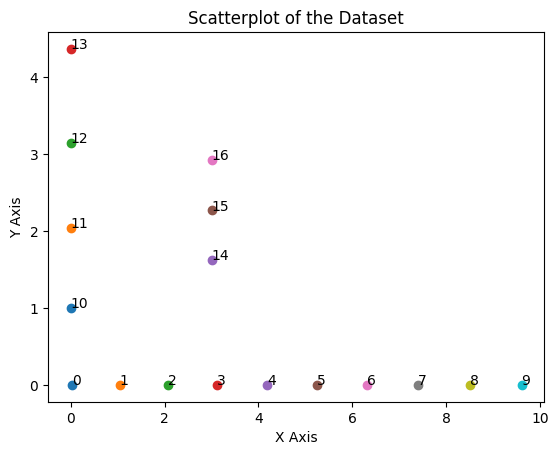

In [172]:
# Plot the scatterplot of the dataset with a unique integer number on top of each point
# Plot each point in the dataset with a unique integer label on top
for i, point in enumerate(data):
    plt.scatter(point[0], point[1])
    plt.text(point[0], point[1], str(i), fontsize=10)

# Set the plot title and axis labels
plt.title("Scatterplot of the Dataset")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

# Show the plot
plt.show()

Step 4: show the corresponding dendrogram where on each leaf the same integer number as the corresponding point of the scatterplot is indicated

<ipython-input-173-c68cdd00ddcc>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = shc.dendrogram(shc.linkage(distance_matrix, method='single'), labels=[str(i) for i in range(len(data))])


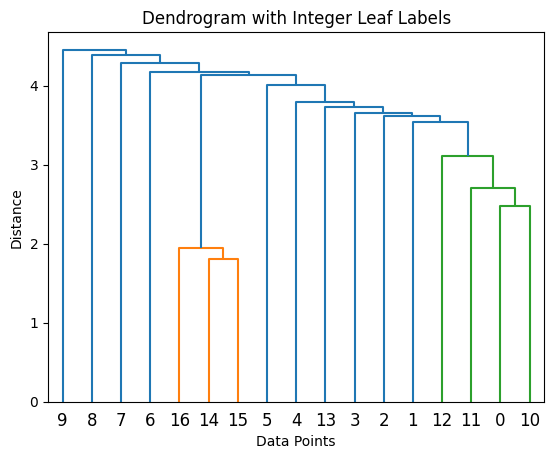

In [173]:
# Generate the dendrogram
distance_matrix = compute_distance_matrix(data)
dendrogram = shc.dendrogram(shc.linkage(distance_matrix, method='single'), labels=[str(i) for i in range(len(data))])

# Set the plot title and axis labels
plt.title("Dendrogram with Integer Leaf Labels")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Show the plot
plt.show()

Step 5: Explain if and how exactly we can obtain clusters identical to the ground-truth clusters shown in the dataset

Theoretically, if the distance metric and link criteria are properly selected, and if the number of clusters is correctly specified, it is possible to obtain a cluster that is the same as the cluster displayed in the data set with single-linkage. However, this is not always possible, especially with datasets that have 13 attributes with hundreds of points of data. To obtain the same cluster as the ground-truth clusters, one method is to set the number of clusters to the number of real clusters in the data, use the distance measurement reflecting the underlying structure of the data, and the selection of linkage criteria will also affect the clustering results.

# Reference

https://www.kaggle.com/code/raphaelekete/cluster-analysis-of-breast-cancer-data-set
https://www.kaggle.com/code/saptarsi/agglomarative-clustering-sg/notebook#Question-1:What-are-some-of-the-parameters-of-Aggolomarative-Clustering?-
https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/
https://stackabuse.com/bytes/agglomerative-hierarchical-clustering-with-scikit-learn/
https://blog.csdn.net/weixin_38094405/article/details/105098633
https://blog.csdn.net/june_young_fan/article/details/127666032
https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
https://blog.csdn.net/mr_muli/article/details/84590840
https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
https://stackoverflow.com/questions/29481485/creating-a-distance-matrix
https://stackoverflow.com/questions/46700326/calculate-distances-between-one-point-in-matrix-from-all-other-points
https://github.com/OlaPietka/Agglomerative-Hierarchical-Clustering-from-scratch
https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://www.w3schools.com/python/python_ml_cross_validation.asp
https://vitalflux.com/k-fold-cross-validation-python-example/
https://stackoverflow.com/questions/59282807/creating-k-dataframe-using-train-index-test-index-of-kfold-cross-validation-in